# **Sentiment Analysis Using Classic ML**

**Consider Changing Runtime To GPU for fast run**

## GPU

In [61]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Clone Repository

In [62]:
!git clone https://github.com/U-sama/SentimentAnalysis.git

Cloning into 'SentimentAnalysis'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 4), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


## Working Directory

In [63]:
%cd /content/SentimentAnalysis

/content/SentimentAnalysis


## Libraries

In [64]:
#!unzip archive.zip

In [65]:
import numpy as np
import pandas as pd
import time 
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer

nltk.download('stopwords')
english_stop_words = stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer #for stemming

from nltk.stem import WordNetLemmatizer


#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Prepration

In [66]:
headers=['Tweet_ID','Entity','Sentiment','Tweet_content']


t_df=pd.read_csv('twitter_training.csv', sep=',', names=headers)

v_df=pd.read_csv('twitter_validation.csv', sep=',', names=headers)

In [67]:
t_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [68]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [69]:
v_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [70]:
v_df.Tweet_content[3]

"CSGO matchmaking is so full of closet hacking, it's a truly awful game."

In [71]:
t_df.value_counts()

Tweet_ID  Entity                             Sentiment   Tweet_content                                                                                                                  
3018      Dota2                              Positive    Wow.                                                                                                                               5
4050      CS-GO                              Positive    Wow                                                                                                                                5
10181     PlayerUnknownsBattlegrounds(PUBG)  Irrelevant  Really                                                                                                                             5
8808      Nvidia                             Positive    Wow                                                                                                                                5
6928      johnson&johnson                    Negative  

In [72]:
t_df.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [73]:
t_df.Sentiment.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

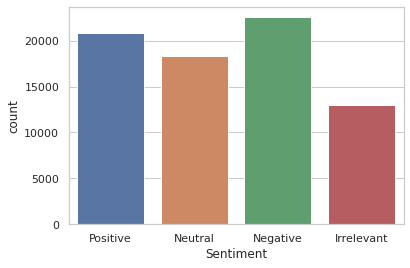

In [74]:
sns.countplot(x=t_df.Sentiment)

### Removing Duplicates

In [75]:
t_df.duplicated().sum()

2700

In [76]:
t_df.drop_duplicates(inplace=True)

In [77]:
t_df.duplicated().sum()

0

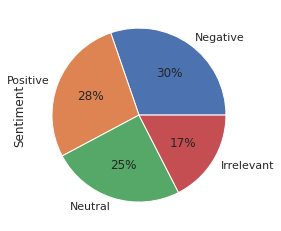

In [78]:
t_df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [79]:
t_df.groupby(['Entity', 'Sentiment']).Sentiment.count().unstack()

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,187,566,1207,304
ApexLegends,185,579,915,610
AssassinsCreed,256,366,153,1385
Battlefield,908,449,345,565
Borderlands,238,415,584,974
CS-GO,622,337,525,723
CallOfDuty,660,866,368,428
CallOfDutyBlackopsColdWar,549,546,344,822
Cyberpunk2077,462,363,458,910


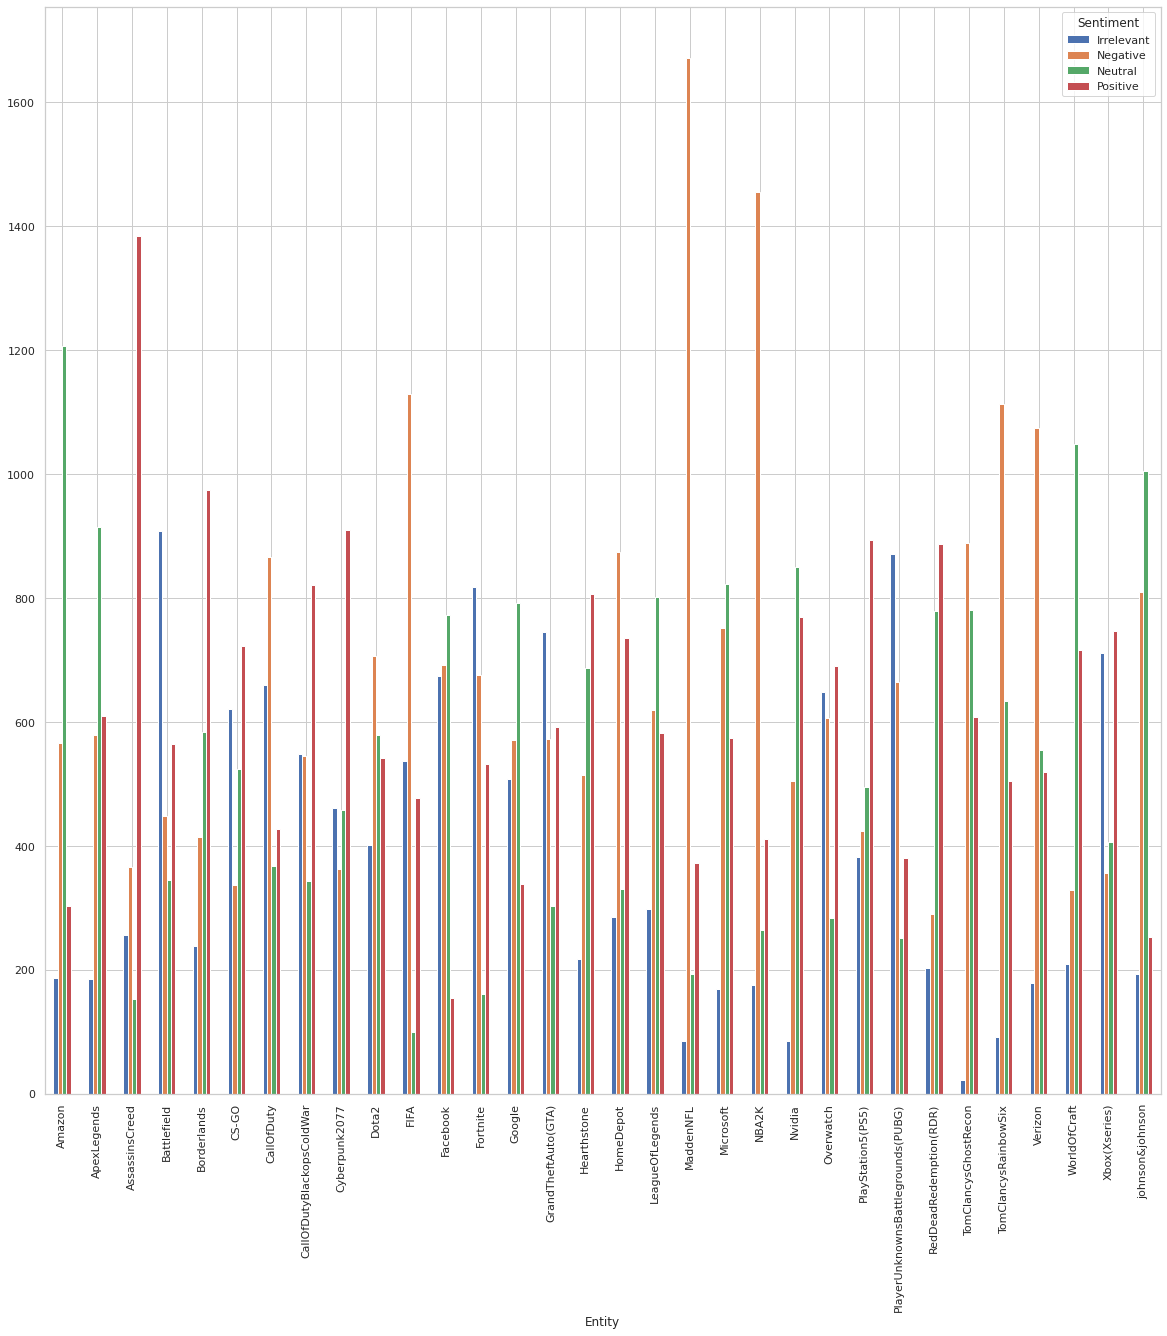

In [80]:
Twitter_sentiment = t_df.groupby(['Entity', 'Sentiment']).Sentiment.count().unstack()
Twitter_sentiment.plot(kind='bar',figsize=(20,20))

### Encoding Lables

In [81]:
# encoder for target feature
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
t_df['Sentiment']=lb.fit_transform(t_df['Sentiment'])

In [82]:
t_df.Sentiment.value_counts()

1    21787
3    19811
2    17800
0    12584
Name: Sentiment, dtype: int64

In [83]:
t_df.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,I am coming to the borders and I will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...


In [84]:
t_df['Tweet_content'].isnull().sum()

326

In [85]:
t_df.dropna(inplace=True, axis=0)

In [86]:
t_df['Tweet_content'].isnull().sum()

0

In [87]:
tweet_train = t_df['Tweet_content']
tweet_val = v_df['Tweet_content']
target = t_df['Sentiment']

In [88]:
print(tweet_train[0])
print(target[0])

im getting on borderlands and i will murder you all ,
3


### Removing @ sign

In [89]:
reblace_with_space = re.compile("(@)")
space = " "

def preprocess_reviews(reviews):
  reviews = [reblace_with_space.sub(space, line.lower()) for line in reviews]
  return reviews

reviews_train_clean = preprocess_reviews(tweet_train)
reviews_val_clean = preprocess_reviews(tweet_val)

In [90]:
len(reviews_train_clean)

71656

### Removing stop words

In [91]:
def removing_stowords(corpus):
  removed_stop_words = []
  for review in corpus:
    removed_stop_words.append(' '.join([word for word in review.split()
     if word not in english_stop_words]))
  return removed_stop_words

no_stop_train_clean = removing_stowords(reviews_train_clean)
no_stop_val_clean = removing_stowords(reviews_val_clean)

In [92]:
len(no_stop_train_clean)

71656

### Stemming

In [93]:
def get_stemmed_text(corpus):
  stemmer = PorterStemmer()
  return [' '.join(stemmer.stem(word) for word in review.split()) for review in corpus]

stemmed_review_train = get_stemmed_text(no_stop_train_clean)
stemmed_review_val = get_stemmed_text(no_stop_val_clean)

In [94]:
len(stemmed_review_train), len(stemmed_review_val)

(71656, 1000)

### Bag of words representation

In [95]:
tfidf_vectorizer = TfidfVectorizer(max_features=2900)
tfidf_vectorizer.fit(stemmed_review_train)
x = tfidf_vectorizer.transform(stemmed_review_train)
x_test = tfidf_vectorizer.transform(stemmed_review_val)

### How the data is cleaned

In [96]:
t_df.Tweet_content[0]

'im getting on borderlands and i will murder you all ,'

In [97]:
tweet_train[0]

'im getting on borderlands and i will murder you all ,'

In [98]:
reviews_train_clean[0]

'im getting on borderlands and i will murder you all ,'

In [99]:
no_stop_train_clean[0]

'im getting borderlands murder ,'

In [100]:
stemmed_review_train[0]

'im get borderland murder ,'

In [101]:
x[0].shape

(1, 2900)

In [102]:
'get' in tfidf_vectorizer.get_feature_names_out()

True

In [103]:
x.shape[0]*0.75

53742.0

## Spliting Data

In [104]:
x_train, x_val, y_train, y_val = train_test_split(x, target, train_size=0.8)

In [105]:
x_train.shape, y_train.shape

((57324, 2900), (57324,))

## ML Models

### Random Forest

In [106]:
random_forest = RandomForestClassifier(n_estimators = 300)
random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [107]:
y_pred = random_forest.predict(x_val)
random_forest_report = classification_report(y_val,y_pred, output_dict=True)
print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2476
           1       0.90      0.90      0.90      4381
           2       0.90      0.87      0.89      3490
           3       0.82      0.92      0.87      3985

    accuracy                           0.88     14332
   macro avg       0.89      0.87      0.88     14332
weighted avg       0.88      0.88      0.88     14332



### GaussianNB

In [108]:
Gauss_nb = GaussianNB()
Gauss_nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [109]:
y_pred = Gauss_nb.predict(x_val.toarray())
Gauss_nb_report = classification_report(y_val,y_pred, output_dict=True)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.92      0.43      2476
           1       0.74      0.35      0.48      4381
           2       0.70      0.26      0.38      3490
           3       0.52      0.36      0.42      3985

    accuracy                           0.43     14332
   macro avg       0.56      0.47      0.43     14332
weighted avg       0.59      0.43      0.43     14332



### Linear SVC

In [110]:
svc = LinearSVC()
svc.fit(x_train, y_train)

LinearSVC()

In [111]:
y_pred = svc.predict(x_val.toarray())
svc_report = classification_report(y_val,y_pred, output_dict=True)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56      2476
           1       0.71      0.75      0.73      4381
           2       0.65      0.59      0.62      3490
           3       0.62      0.71      0.66      3985

    accuracy                           0.66     14332
   macro avg       0.65      0.64      0.64     14332
weighted avg       0.65      0.66      0.65     14332



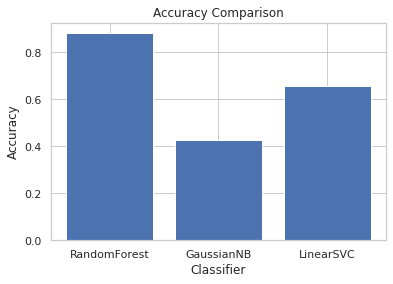

In [113]:
import matplotlib.pyplot as plt

x_axis = ['RandomForest', 'GaussianNB', 'LinearSVC']
y_axis = [random_forest_report['accuracy'], Gauss_nb_report['accuracy'], svc_report['accuracy']]

plt.bar(x_axis, y_axis)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

# Conclution
**As we can see After using 3 classifiers in our data<br>
Random Forest model with no doubt the best classifier for<br> Twitter Sentiment analysis dataset**

# Predict your sentence

In [138]:
def preprocess(txt):
  txt = removing_stowords([txt.lower()])
  txt = get_stemmed_text([txt[0]])
  txt = tfidf_vectorizer.transform([txt[0]])
  return txt

In [136]:
def predict(txt):
  x = preprocess(txt)
  y = random_forest.predict(x)
  print(lb.inverse_transform(y)[0])

In [143]:
review = 'the movie was awesome I will watch it again' # Positive one
#review = 'this movie has sad ending' # Negative one 
predict(review)

Positive
